In [2]:
# imports
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [36]:
import pathlib
data_dir = pathlib.Path('/Users/apple/Downloads/SDP/images')
img_height = 224
img_width = 224

# import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset='training', seed=123, image_size=(img_height, img_width), batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset='validation', seed=123, image_size=(img_height, img_width), batch_size=32)

normalization_layer = tf.keras.layers.Rescaling(1./255)

import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3662 files belonging to 5 classes.
Using 2930 files for training.
Found 3662 files belonging to 5 classes.
Using 732 files for validation.
0.0 1.0


In [37]:
train_ds, val_ds

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [38]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout

base_model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

for layer in base_model.layers[:10]:
	layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(5, activation='softmax')(x)
model1 = Model(inputs=base_model.inputs, outputs=predictions)

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in base_model.layers[:10]:
	layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(5, activation='softmax')(x)
model2 = Model(inputs=base_model.inputs, outputs=predictions)

In [41]:
model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [42]:
# history1=model1.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=25)
history1 = model1.fit(train_ds, validation_data=val_ds, epochs=5, callbacks=[checkpoint])

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6352 - loss: 1.0742
Epoch 1: val_accuracy improved from -inf to 0.50410, saving model to /Users/apple/Downloads/SDP/model-01-0.5041.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 524s 5s/step - accuracy: 0.6359 - loss: 1.0723 - val_accuracy: 0.5041 - val_loss: 6.1625
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7457 - loss: 0.6896
Epoch 2: val_accuracy improved from 0.50410 to 0.53825, saving model to /Users/apple/Downloads/SDP/model-02-0.5383.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 556s 6s/step - accuracy: 0.7457 - loss: 0.6898 - val_accuracy: 0.5383 - val_loss: 15.4996
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7641 - loss: 0.6445
Epoch 3: val_accuracy improved from 0.53825 to 0.73224, saving model to /Users/apple/Downloads/SDP/model-03-0.7322.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 522s 6s/step - accuracy: 0.7640 - loss: 0.6447 - val_accuracy: 0.7322 - val_loss: 0.8102
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accur

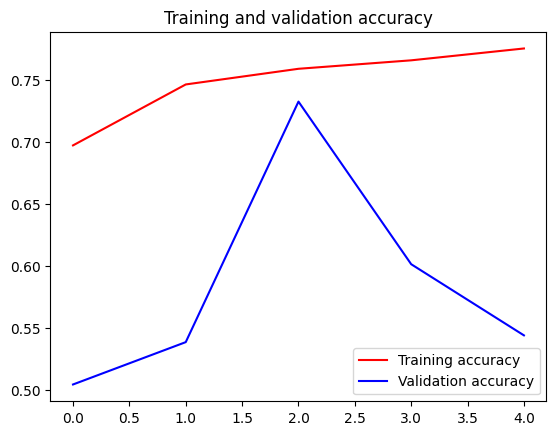

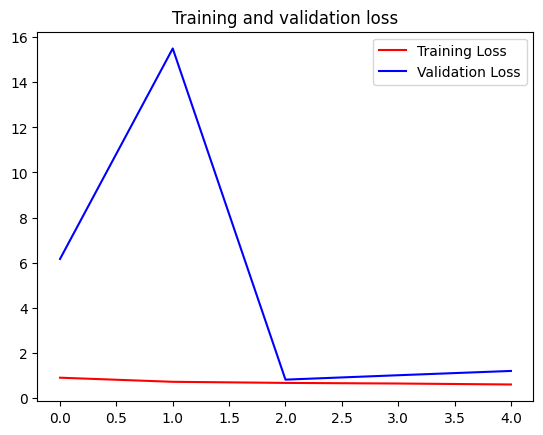

In [43]:
model1.save('model1f.keras')

import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 1048s 11s/step - accuracy: 0.4758 - loss: 4.7232 - val_accuracy: 0.5055 - val_loss: 1.0189
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 1235s 13s/step - accuracy: 0.6527 - loss: 0.9920 - val_accuracy: 0.7213 - val_loss: 0.7962
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 1286s 14s/step - accuracy: 0.6905 - loss: 0.8736 - val_accuracy: 0.7240 - val_loss: 0.7771
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 1290s 14s/step - accuracy: 0.7428 - loss: 0.7720 - val_accuracy: 0.7186 - val_loss: 0.7834
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 1300s 14s/step - accuracy: 0.7237 - loss: 0.7779 - val_accuracy: 0.7268 - val_loss: 0.7778


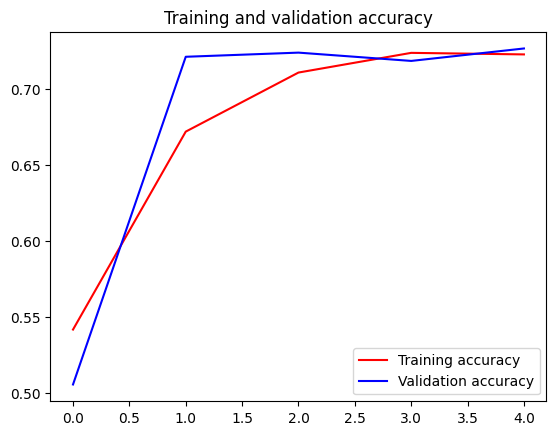

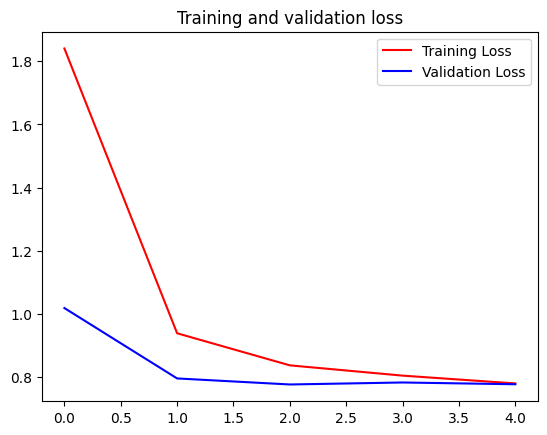

In [46]:
history2=model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5)

model2.save('model2f.keras')

import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/model1.h5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('/content/model2.h5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
models = [model_1, model_2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history=ensemble_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25)

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

train_label = np.concatenate([y for x, y in train_ds], axis=0)
print(train_label.shape)

test_label = np.concatenate([y for x, y in val_ds], axis=0) 
print(test_label.shape)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = ensemble_model.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names = ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
print(classification_report(test_label, y_pred, target_names=target_names))

import seaborn as sns
sns.set(font_scale=1.0)
ax=sns.heatmap(cm, annot=True, cmap='summer', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=target_names,yticklabels=target_names,fmt='')
#sns.heatmap(cm, annot=True,annot_kws={"size": 22})
sns.set(font_scale = 2.0)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');